### Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE
from torch.utils.data import TensorDataset, DataLoade

### Определение устройства 

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Загрузка и работа с данными 

In [3]:
wine_white = pd.read_csv('winequality-white.csv', sep=';')
wine_red = pd.read_csv('winequality-red.csv', sep=';')

In [4]:
wine_white['wine_type'] = 1  # 1 для белого
wine_red['wine_type'] = 0    # 0 для красного

In [5]:
wine = pd.concat([wine_white, wine_red], axis=0, ignore_index=True)

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


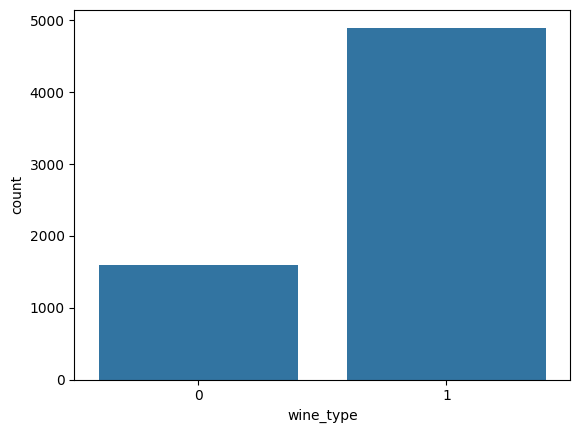

In [9]:
sns.countplot(x=wine['wine_type'], data=wine)
plt.show()

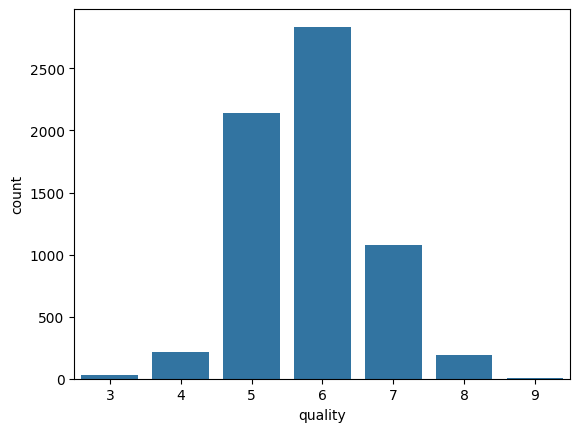

In [10]:
sns.countplot(x=wine['quality'], data=wine)
plt.show()

##### Наблюдается сильный дизбаланс классов

#### Поиск пропущенных значений 

In [11]:
def percent_missing(df):
    total = 100 *df.isnull().sum() / len(df)
    total = total[total > 0].sort_values(ascending=False)
    return total

In [12]:
missing = percent_missing(wine)
missing

Series([], dtype: float64)

#### Корелляция и обработка выбросов

In [13]:
df_corr = wine.select_dtypes(include=[int,float])
df_corr.corr()['quality'].sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
wine_type               0.119323
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64

In [14]:
col = ['citric acid', 'alcohol', 'free sulfur dioxide', 'sulphates', 'pH'] # фичи с корелляцией для обработки выбросов

#### Графики до обработки выбросов

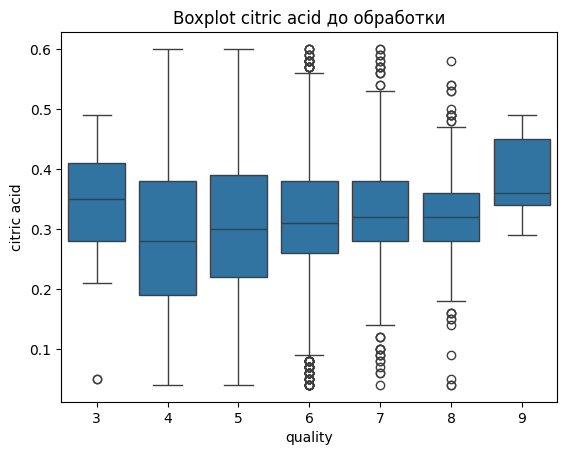

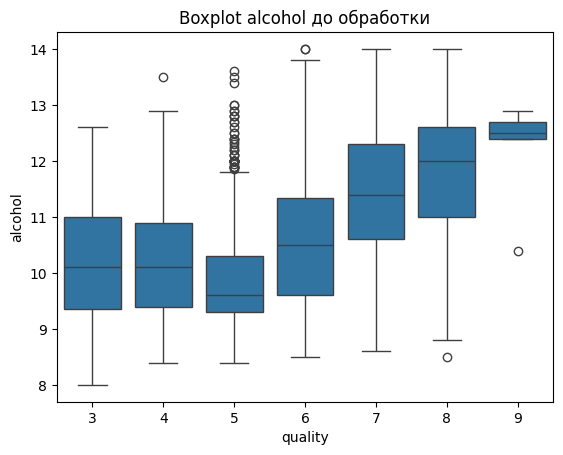

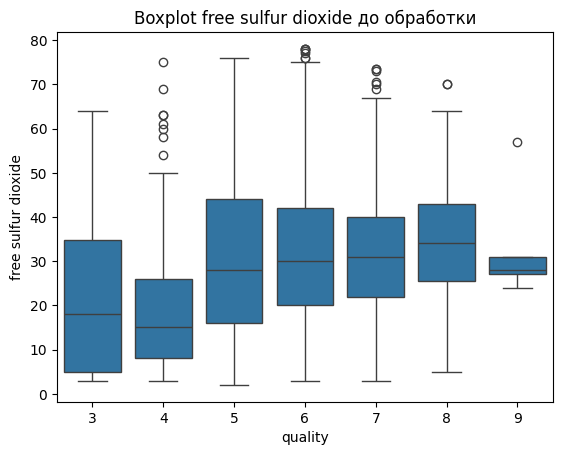

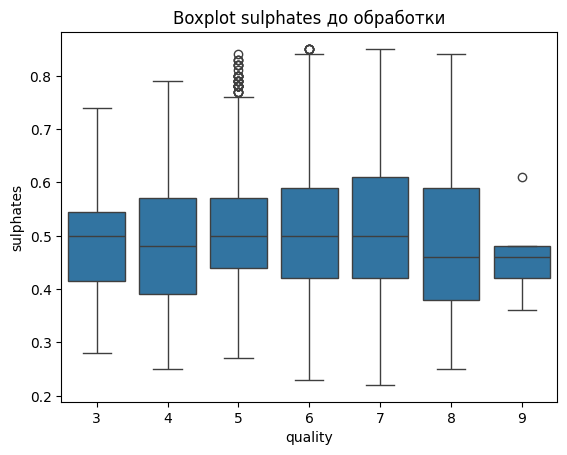

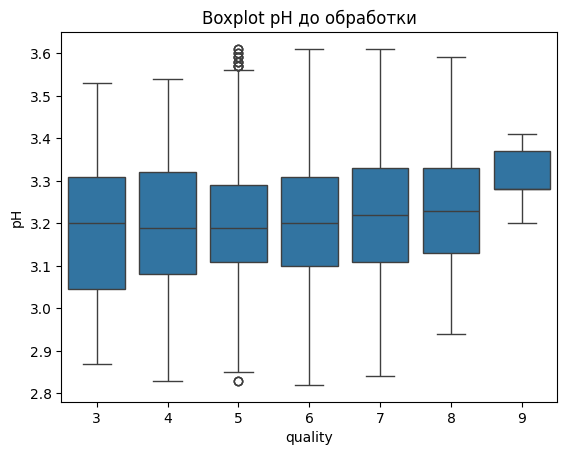

In [44]:
for c in col:
    sns.boxplot(y=wine[c], x=wine['quality'])
    plt.title(f'Boxplot {c} до обработки')
    plt.show()

In [16]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_cleaned

In [17]:
for c in col:
    wine = remove_outliers(wine, c)

#### Графики после обработки выбросов

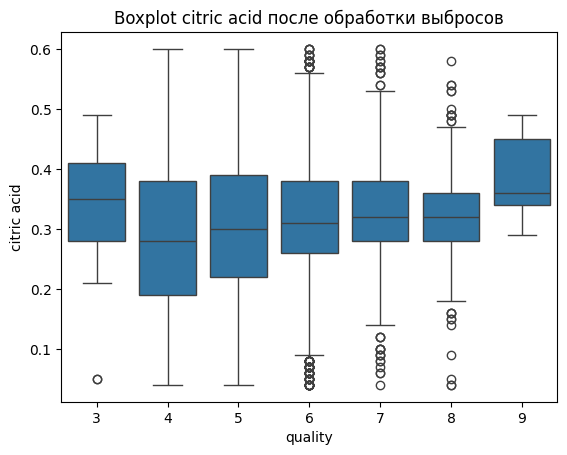

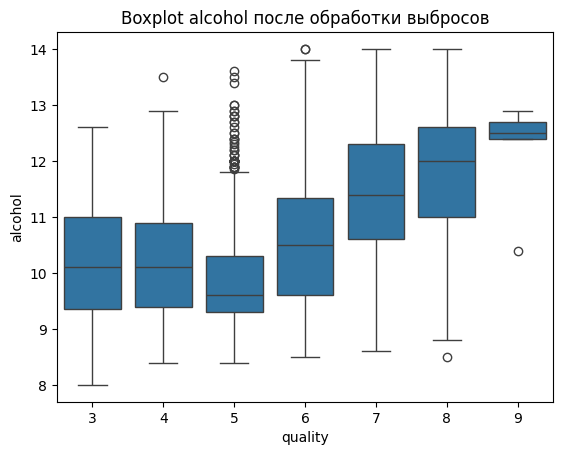

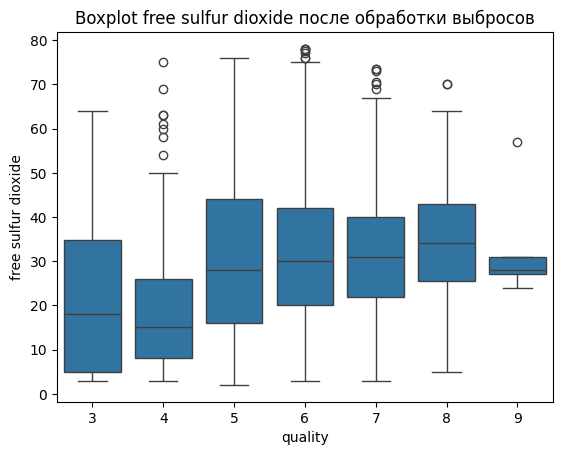

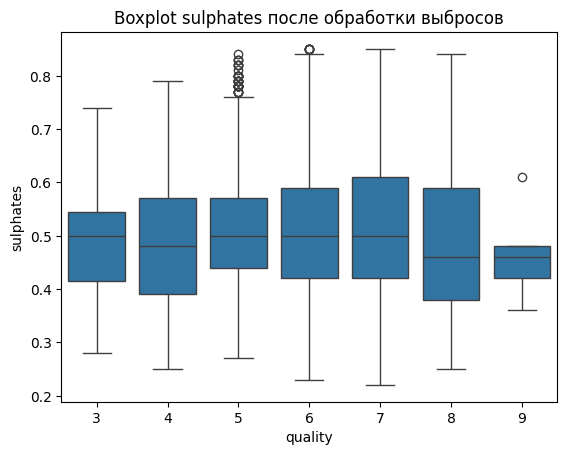

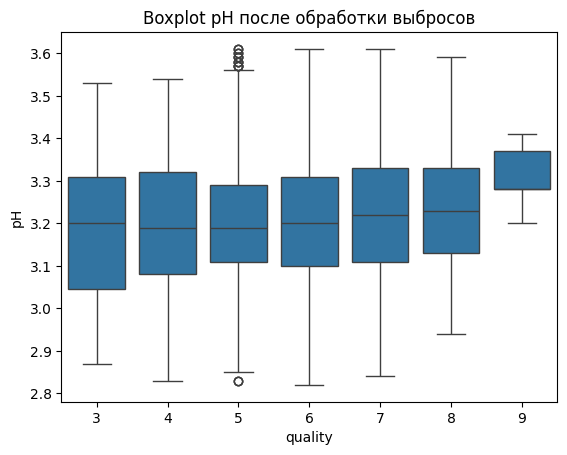

In [43]:
for c in col:
    sns.boxplot(y=wine[c], x=wine['quality'])
    plt.title(f'Boxplot {c} после обработки')
    plt.show()

#### Создание новых фичей

In [19]:
def alcohol_categ(alcohol):
    if alcohol < 10:
        return 0  # low
    elif 10 <= alcohol < 12:
        return 1  # medium
    else:
        return 2  # high

In [20]:
wine['alcohol_level'] = wine['alcohol'].apply(alcohol_categ).astype(int)
wine['free_total_sulfur_ratio'] = wine['free sulfur dioxide'] / wine['total sulfur dioxide'] # Отношение свободного и общего диоксида серы

####  Работа с дисбалансом классов (генерация для 3,4,8,9)

In [21]:
wine_balanced = wine[wine['quality'].isin([3, 4, 8, 9])].copy()

In [22]:
X = wine_balanced.drop('quality', axis=1)
y = wine_balanced['quality']

In [23]:
smote = SMOTE(sampling_strategy={8: 179, 4: 184, 3: 100, 9: 100}, k_neighbors=3)

In [24]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
wine_resampled = pd.DataFrame(X_resampled, columns=X.columns)
wine_resampled['quality'] = y_resampled

In [26]:
wine_final = pd.concat([wine_resampled, wine[~wine['quality'].isin([3, 4, 8, 9])]], ignore_index=True)

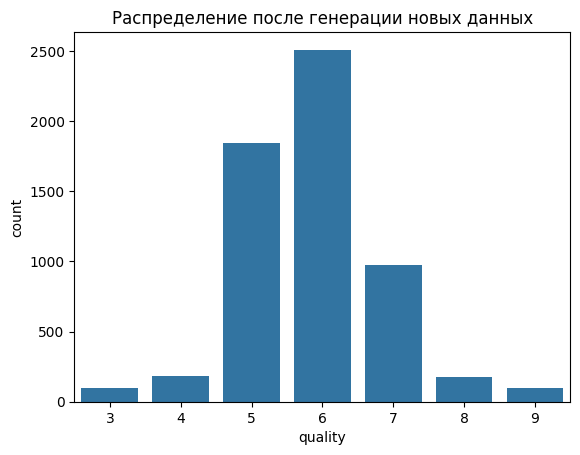

In [27]:
sns.countplot(x=wine_final['quality'], data=wine)
plt.title('Распределение после генерации новых данных')
plt.show()

#### Разделение на тест и трейн выборку

In [28]:
X_train, X_test, y_train, y_test = train_test_split(wine_final.drop('quality', axis=1),
                                                    wine_final['quality'],
                                                    test_size=0.2,
                                                    random_state=42)

#### Параметры модели

In [29]:
batch_size = 64
hidden = [256, 128, 64] # Описание архитектуры: 3 скрытых слоя с 256, 128 и 64 нейронами соответственно
num_epochs = 300

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float32).to(device)

In [32]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)

In [33]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#### Создание модели

In [34]:
class WineModel(nn.Module):
    def __init__(self, input_s, hidden_s):
        super(WineModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_s, hidden_s[0]),
            nn.BatchNorm1d(hidden_s[0]), 
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_s[0], hidden_s[1]),
            nn.BatchNorm1d(hidden_s[1]),  
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_s[1], hidden_s[2]),
            nn.BatchNorm1d(hidden_s[2]),  
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(hidden_s[2], 1)
        )

    def forward(self, x):
        return self.layers(x)

In [35]:
model = WineModel(input_s =X.shape[1], hidden_s=hidden).to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.001, weight_decay=0.0001)

#### Обоснование выбора AdamW и параметров: AdamW хорошо работает для задач регрессии и позволяет контролировать переобучение с помощью weight_decay.

#### Обучение модели

In [36]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            val_loss += loss.item()
    val_loss /= len(val_loader)

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.5f}, Val Loss: {val_loss:.5f}')

Epoch [50/300], Train Loss: 0.61090, Val Loss: 0.52306
Epoch [100/300], Train Loss: 0.51821, Val Loss: 0.47704
Epoch [150/300], Train Loss: 0.44741, Val Loss: 0.45788
Epoch [200/300], Train Loss: 0.42134, Val Loss: 0.44205
Epoch [250/300], Train Loss: 0.38819, Val Loss: 0.43396
Epoch [300/300], Train Loss: 0.37501, Val Loss: 0.42324


In [37]:
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for inputs, targets in DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False):
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        y_true.extend(targets.cpu().numpy())
        y_pred.extend(outputs.squeeze().cpu().numpy())

#### Результаты модели

In [38]:
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

In [39]:
print(f'R2: {r2:.5f}')
print(f'MAE: {mae:.5f}') 

R2: 0.61113
MAE: 0.50595


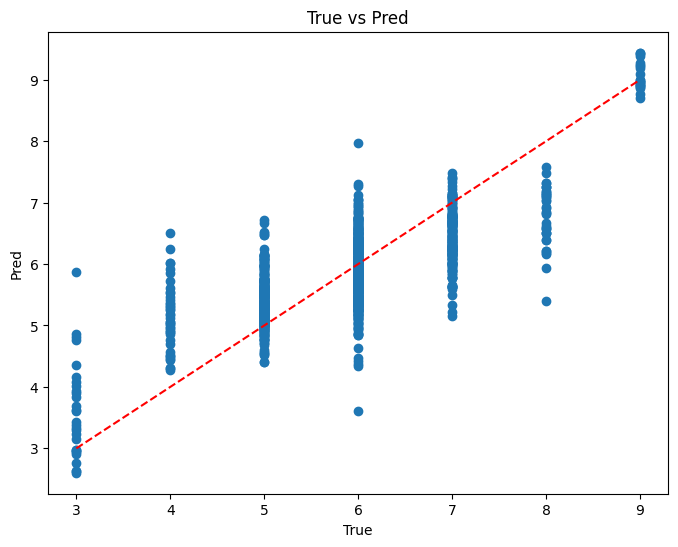

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred)
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("True vs Pred")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--') 
plt.show()